In [11]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 20})

In [12]:
img = mpimg.imread("Cameraman_gs.png")
u, s, vh = np.linalg.svd(img, full_matrices=False)
for N_vec in range(256):
    recon_img = np.zeros(img.shape)
    for i in range(0,N_vec):
        recon_img = recon_img+np.matmul(np.expand_dims(u[:,i], axis=1), np.expand_dims(vh[i,:], axis=0))*s[i]
    fig, ax = plt.subplots(1,2, figsize=(10*2,22*2))
    ax[0].imshow(img, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title("Full image")
    ax[1].imshow(recon_img, cmap='gray')
    ax[1].axis('off')
    ax[1].set_title("Reconstructed image with "+str(N_vec).zfill(3)+" components")
    fig.savefig("./figs/SVD_recon_"+str(N_vec).zfill(3)+".png", dpi=100, bbox_inches='tight', transparent=False, facecolor='white')
    plt.close()

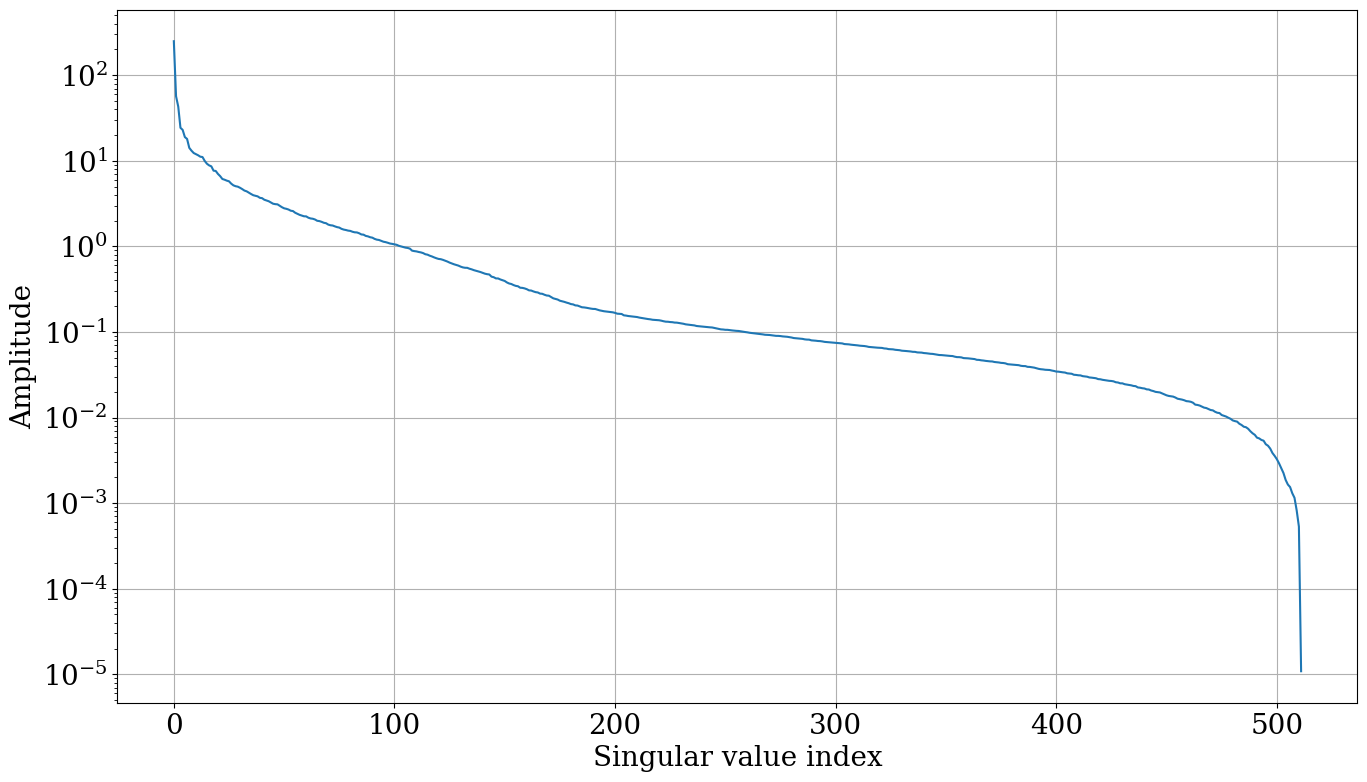

In [13]:
plt.figure(figsize=(16,9))
plt.semilogy(s)
plt.xlabel("Singular value index")
plt.ylabel("Amplitude")
plt.grid()